# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets/
* https://www.kaggle.com/datasets
* https://data-flair.training/blogs/machine-learning-datasets/ 
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 


_If you instead are planning to do a more research-oriented or applied type of project, then describe what it is that you plan to do._

_If it is research, then what do you want to understand/explain better?_

_If it is applied, then what it is you plan to build?_ 

The data set I am using came from Kaggle called emotion and text. What the data set is about is determining the type of emotion that is coming from a given text. What I am trying to do is to train a model to tell a text is displaying a positive emotion or a negetive emotion. This is a text classification because it is putting texts or words in groups to determine the resulting emotion. It is binary because the model will show if it either a positive emotion or the text is showing a negative emotion. 

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion/Emotion_final.csv


In [49]:
data = pd.read_csv('/kaggle/input/emotion/Emotion_final.csv')

I wanted to trim down the amount of data to look at. I thought 10,000 would be a good number. I felt like it was not too large or too small. Need enough data to see the trends that's going on. 

In [50]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


I wanted to see how much data was in the data set itself. It had 10,000 total data. 

In [52]:
# Check nulls
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

Checking to see if any data were empty and not labeled. 

In [53]:
data['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

I wanted to get the total emotions that were in the data itself. The emotions that the data had were happy, sadness, anger, fear, love,  and surprise. 

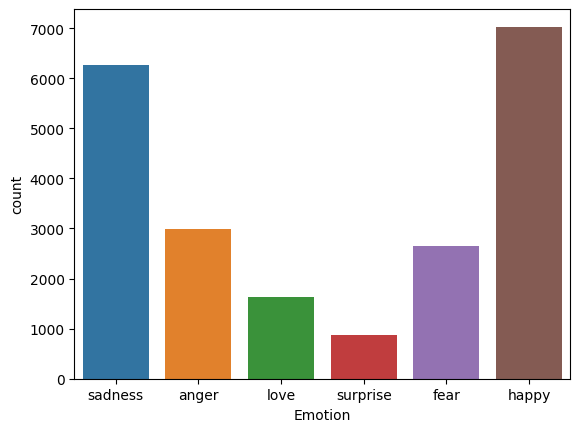

In [54]:
sns.countplot(x=data['Emotion'])
plt.show()

Bar graph showing the emotions that are distubuted in the data and adding up the total in each one.

<Axes: >

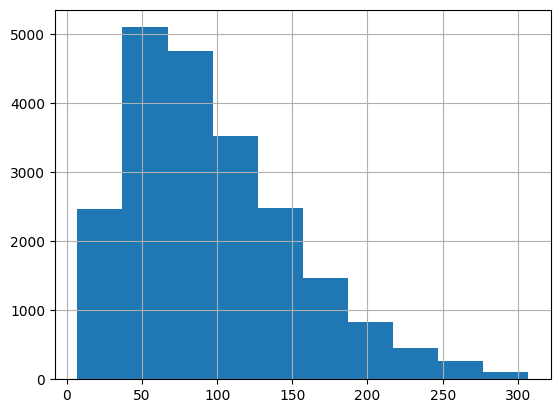

In [55]:
data['Text'].str.len().hist()

The histogram is showing how many characters there are in a given text. The most common amount of charcters in the text seems to be between 50 - 100. I was thinking maybe to trim the chacters to 50 since that seems to be the common one. Don't want too much chacters just in case it could be outliers of cahracters that wouldn't be neccessary to train a model. 

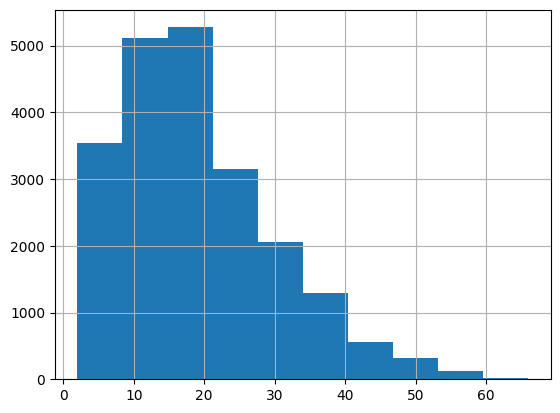

In [56]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(data['Text'])

I wanted to see how many words there are in the text. The most common one would be around 20. I think this would be good to use to know how many words are usually in text. I might want to do around 20 so then the model would know how many words to look at. 

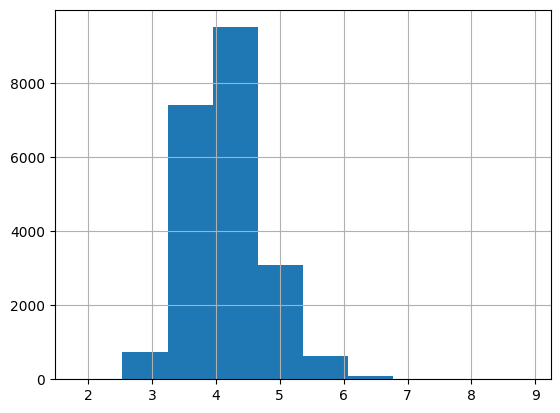

In [57]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(data['Text'])

I wanted to see what the average length of a text would be. From the histrogram it looks to be around 4 - 5. That would be good to use to tune model around that length in. I think maybe a little more wouldn't hurt so 7 would be ok as well in my opinion. 

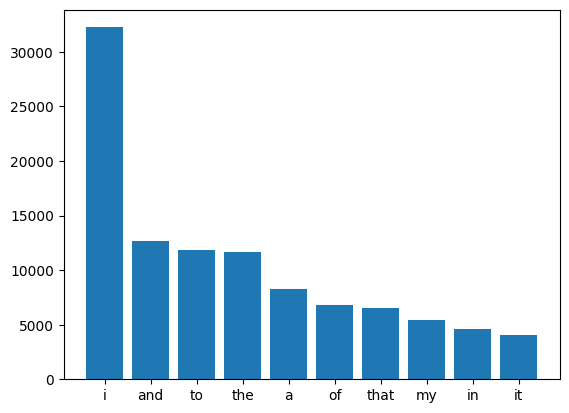

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(data['Text'])

Wanted to filter out the stop words that could possibly cause the data to predict the output incorrectly or take it out so the output could be more correct. It seems that I is the most occurent stop word that needs to be taken out of the text to get more of an accurate read. But I was also thinkg that I might leave that in just cause it kind of signals text is about to give out emotions based on someone's feeligs in the text. 

As a conclusion I could sort out the emotions of the data set that it has as either a negitive or positive emotion. I would have to split up the data in either two. I would need to take out the stop words to see if that would improve it. I would need to possibly do lemiazation so there won't be duplicates of the same words with differnt meaning that the model might mislabel. I could use the frequency of the words to see how I should cut it to make it more accurate. 